In [58]:
# matplotlib notebook
import matplotlib.pyplot as plt
from astropy.io.fits import getdata
from scipy.signal import medfilt, medfilt2d
import os,sys

from grism_analysis_lib import grism_analysis

In [87]:
fts_file = '../images/xwg32215.fts'

if not os.path.exists(fts_file):
    print('FITS file %s not found, check name/path' % fts_file)

im, hdr = getdata(fts_file, 0, header=True)
grism_filter = hdr['FILTER'][0]
star = hdr['OBJECT']
print('Analyzing image %s, grism filter %s' % (fts_file,grism_filter))

Analyzing image ../images/xwg32215.fts, grism filter 8


In [88]:
cal_directory = '../calibrations'  # Change as needed
cal_date = '2021_11_18'
cal_file = '%s/grism_cal_%s_%s.csv' % (cal_directory,grism_filter,cal_date)
if os.path.exists(cal_file):
    print('Found calibration file %s' % cal_file)
else:
    print('Calibration file %s not found' % cal_file)

Found calibration file ../calibrations/grism_cal_8_2021_11_18.csv


In [89]:
G = grism_analysis(fts_file,cal_file)

title, star, utdate, myfilter,telescope, instrument = G.header_params()
print(star,utdate,myfilter,telescope,instrument)

V1405 Cas 2021-11-18 07:36:20. R Iowa Robotic Telescope SBIG Aluma AC4040


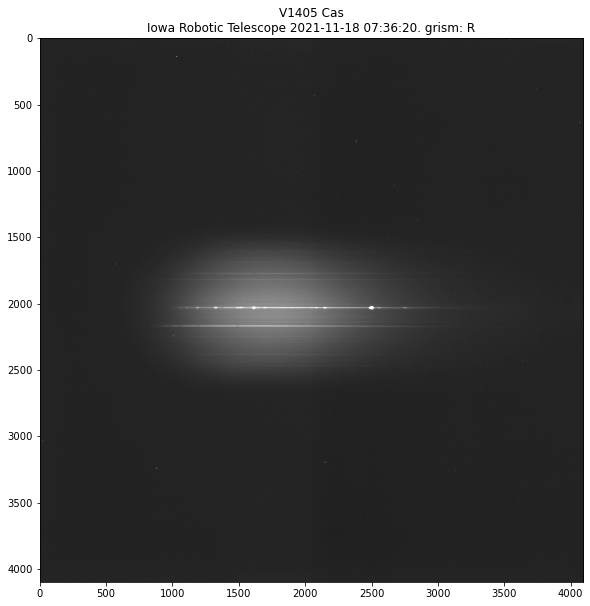

In [90]:
fig = G.plot_image(figsize =(10,10),cmap='gray')
plt.show()

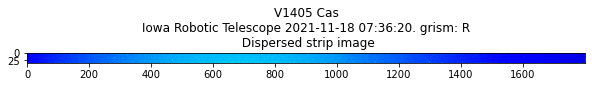

In [91]:
fig = G.plot_strip(cmap='jet')
plt.show()

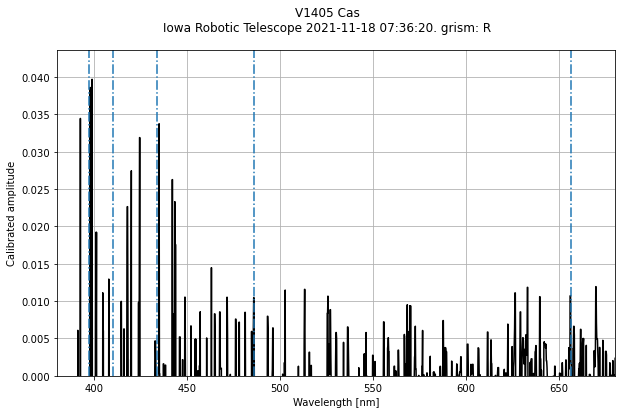

In [92]:
fig = G.plot_spectrum(calibrated = True, plot_balmer=True,title='', medavg = 3)
plt.show()

[ 4.24426355e+00  6.53163395e+02  2.07454129e+00  9.45608197e-02
 -6.20914259e+01]


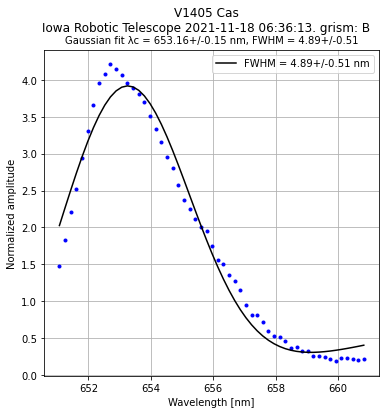

In [31]:
fig,popt = G.fit_gaussian(651,661,emission=True)

print(popt)
plt.show()

In [ ]:
T = 15000

fig = G.plot_rectified_spectrum(T,wavemin=385,wavemax=700)
plt.show()

In [ ]:
ref_file = ''

fig = G.plot_2x2(ref_file=ref_file, medavg=5, xlims =[380,700])
plt.show()

In [ ]:
spectra = os.listdir('Red/')
medavg = 3

spectra.sort()
fig,ax = plt.subplots(1, 1, figsize=(10,6))
iterable, = ax.plot([], [])

def init():
    iterable.set_data([], [])
    return iterable,

def animate(i):
    G = grism_analysis('Red/'+spectra[i],cal_file)
    jd,wave,amp = G.wave_params()
    iterable.set_data(wave, medfilt(amp, kernel_size=medavg))
    ax.set_title('V1405 Cas Timelapse\n JD: %.2f' % jd)
    return iterable,

ax.set_title('V1405 Cas Timelapse\n')
ax.set_xlabel('Wavelength [nm]'); ax.set_ylabel('Calibrated Amplitude')
ax.set_xlim(380, 720); ax.set_ylim(0, 0.5)

anim = FuncAnimation(fig, animate, init_func=init, frames=len(spectra), interval=500)
anim.save('V1405Cas_Red.mp4', writer = 'ffmpeg', fps = 2)